In [1]:
import pandas as pd
import numpy as np

In [48]:
ai_data = pd.read_excel('../autoimmune_data.xlsx')

In [3]:
df.groupby('disease_names')['linear_sequence'].apply(lambda x: len(list(np.unique(x))))

disease_names
{"Behcet's disease"}                                                         12
{"Goodpasture syndrome"}                                                     33
{"Graves' disease, Graves disease"}                                         159
{"Guillain-Barre syndrome"}                                                  10
{"Sjogren's syndrome"}                                                        5
{"Vogt-Koyanagi-Harada disease"}                                             33
{"alopecia areata"}                                                          15
{"ankylosing spondylitis"}                                                   16
{"antiphospholipid syndrome"}                                                 2
{"autoimmune atherosclerosis"}                                                3
{"autoimmune disease of blood"}                                               1
{"autoimmune disease of central nervous system"}                             17
{"autoimmune disease of sk

In [52]:
d = dict(ai_data['linear_sequence'].value_counts())
diseases = ['type_1_diabetes_mellitus', 'autoimmune_hepatisis', 'rheumatoid_arthritis', 'myasthenia_gravis', 'psoriasis']

data = []
for disease in diseases:
    df = pd.read_csv('%s_clustering.csv' % disease)
    df['#_of_assays'] = df['Peptide'].map(d)
    
    for i, group in df.groupby('Cluster.Sub-Cluster Number'):
        if len(group) == 1:
            data.append((group['Peptide'].iloc[0], disease))
        else:
            data.append((group.loc[group.iloc[1:]['#_of_assays'].idxmax()]['Peptide'], disease))
            
    

In [57]:
pd.DataFrame(data, columns=['epitope', 'disease']).to_csv('autoimmune_megapools.csv')

In [61]:
df = pd.read_csv('../data/zeynep/autoimmune_megapools.csv', index_col=0)

In [62]:
df['disease'].value_counts()

type_1_diabetes_mellitus    220
rheumatoid_arthritis        187
myasthenia_gravis           118
autoimmune_hepatisis         71
psoriasis                    41
Name: disease, dtype: int64

In [31]:
import matplotlib.pyplot as plt

import seaborn

from cdhit_reader import read_cdhit

In [30]:
clusters = read_cdhit('../human_db40.clstr')

sizes = []
for cluster in clusters:
    sizes.append(len(cluster))
    if len(cluster) == 151:
        print(cluster)

Cluster(name=Cluster 1112, len=151)


<AxesSubplot:title={'center':'Human Proteome Cluster Sizes using CD-HIT @ 40%'}, xlabel='Protein Count', ylabel='Cluster Frequency'>

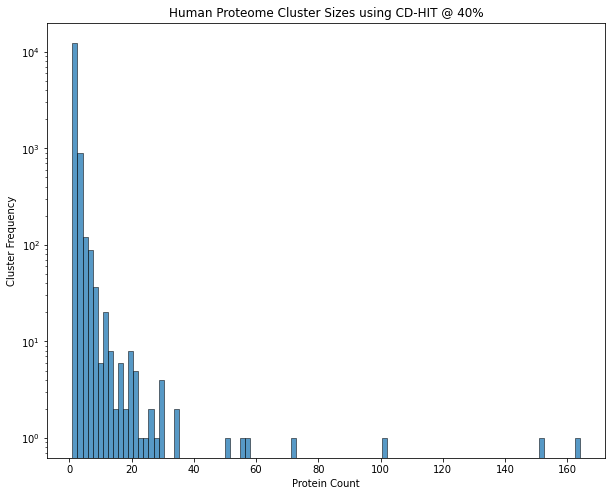

In [39]:
plt.figure(figsize=(10,8))
plt.title('Human Proteome Cluster Sizes using CD-HIT @ 40%')
plt.xlabel('Protein Count')
plt.ylabel('Cluster Frequency')
seaborn.histplot(sorted(sizes, reverse=True)[:], bins=100, log_scale=(False,True), )